<a href="https://colab.research.google.com/github/Cristian-Cortez/CSE337-lab1-bandit/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [1]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

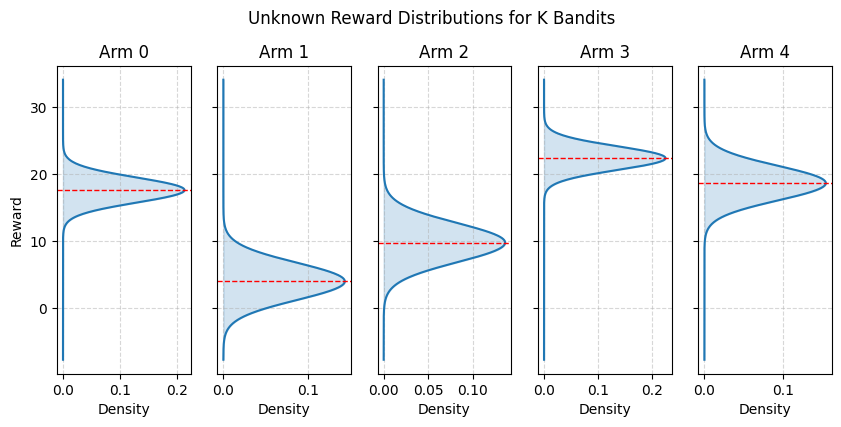

In [3]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

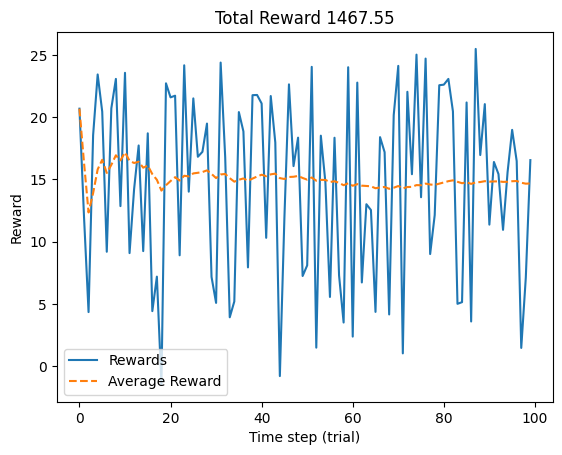

In [4]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

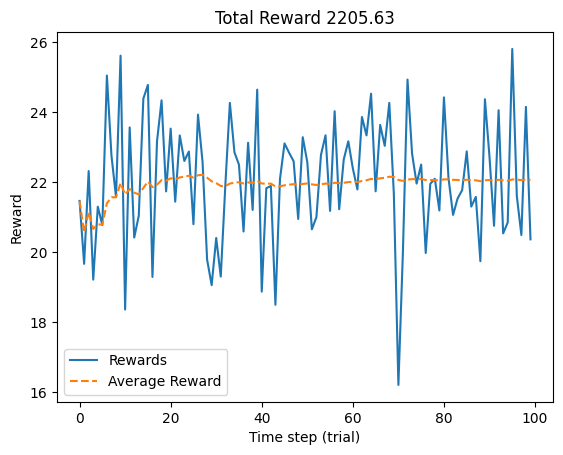

In [5]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose from the 3rd arm every time
  a = 3 ############################ YOUR POLICY HERE #################

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



3


Text(0, 0.5, 'Reward')

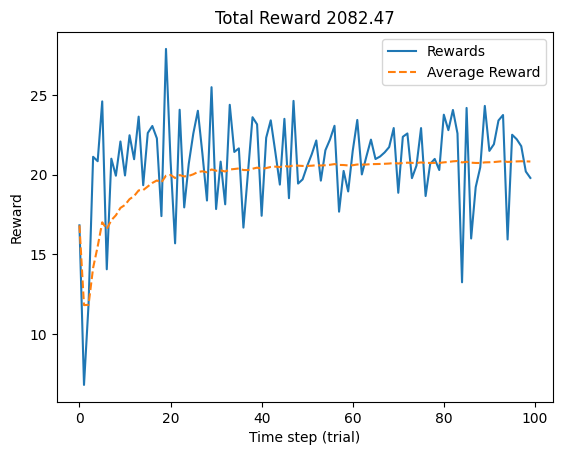

In [6]:
'''
1. Greedy Implementation
'''
# Rewards
rewards = []

# Doing an initial explore of K*3 trials to calculate the best arm to choose
explored_rewards  = [[] for _ in range(K)]
for trial in range(K):
  arm = trial
  r = np.random.normal(bandit_mean[arm], bandit_std[arm])
  rewards.append(r)
  explored_rewards[arm].append(r)

best_arm = np.argmax([np.mean(reward) for reward in explored_rewards])
print(best_arm)

# For T trials, chose the best arm
for t in range(K, T):
  # Action: Choose the best arm using np.argmax
  a = best_arm

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)
  explored_rewards[arm].append(r)

  # Recalculate best arm in case the new average is lower than one of the other arms
  best_arm = np.argmax([np.mean(reward) for reward in explored_rewards])


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")


3
[[14.972232825668282], [1.7010795357734723], [12.083013766422631], [22.063652649740394], [15.40856072036093]]
12


Text(0, 0.5, 'Reward')

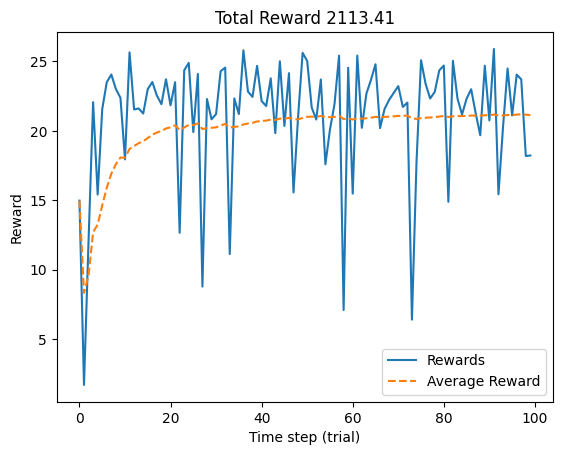

In [7]:
'''
2. Epsilon Greedy Implementation
'''
# Rewards
rewards = []

# Doing an initial explore of K trials to calculate the best arm to choose
explored_rewards  = [[] for _ in range(K)]
for trial in range(K):
  arm = trial
  r = np.random.normal(bandit_mean[arm], bandit_std[arm])
  rewards.append(r)
  explored_rewards[arm].append(r)

best_arm = np.argmax([np.mean(reward) for reward in explored_rewards])
print(best_arm)
print(explored_rewards)

epsilon = 0.1
e_ct = 0
# For T trials, chose the best arm
for t in range(K, T):
  # Action: Choose the best arm using np.argmax
  if random.rand() <= epsilon:
    a = np.random.randint(0, K-1)
    e_ct+=1
  else:
    a = best_arm

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # Recalculate best arm to account for new exploration
  explored_rewards[arm].append(r)
  best_arm = np.argmax([np.mean(reward) for reward in explored_rewards])

print(e_ct)
# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. When ε = 0.001, the total number of rewards I get range from 1900-2100. However, when ε = 0.1, the total number of rewards I get ranges from 2000-2200. ε = 0.001 means that the algorithm will explore only about 0.1% of the time, which will be almost zero is smaller datasets, whereas ε = 0.1 explores 10% of the time, so the algorithm will be learning and recalculating the best arm more often. The advantages of using a larger is that the algorithm will more often explore to see if there is a better arm to choose, which will help increase the overall total number of rewards.

2. A purely greedy strategy is not still effective because the algorithm will only choose the inital best arm. Since the reward distribution changes over time, the initial best arm may not always be the best option as more data is collected. Therefore, the algorithm should try to explore a little bit to see if a different arm may be better than its current best arm.

3. A small value of ε will result in more exploitation because it will explore very little. This means that the algorithm will be more greedy and choose its best-known action so far, so it may miss better options. A larger value of ε will result in more exploration because the algorithm will try new actions a higher percentage of times. In the long run, this may be more beneficial if the reward distribution changes because it may discover potentially better rewards than its current best option.

4. With a significantly higher number of arms, the epsilon-greedy strategy will not be as effective because it is only exploring a small number of times, so if there are a large number of other arms to explore, it will not be able to collect enough data to accurately re-evaluate which arm is truley the best after each iteration. It increases the chances of choose a worse-performing arm when it explores, rather than finding a better-performing one.


